# Word Cloud

In [4]:
# Filepath
path = "Data/Dracula.txt"
# with open syntax
with open(path, encoding = 'utf-8') as f:
    txt = f.read()
# Posting text length
print(f'The length of Dracula is {len(txt)} characters.')

The length of Dracula is 846555 characters.


In [2]:
# Preview
print(txt[:1000])





                                DRACULA

                                  _by_

                              Bram Stoker

                        [Illustration: colophon]

                                NEW YORK

                            GROSSET & DUNLAP

                              _Publishers_

      Copyright, 1897, in the United States of America, according
                   to Act of Congress, by Bram Stoker

                        [_All rights reserved._]

                      PRINTED IN THE UNITED STATES
                                   AT
               THE COUNTRY LIFE PRESS, GARDEN CITY, N.Y.




                                   TO

                             MY DEAR FRIEND

                               HOMMY-BEG




Contents

CHAPTER I. Jonathan Harker’s Journal
CHAPTER II. Jonathan Harker’s Journal
CHAPTER III. Jonathan Harker’s Journal
CHAPTER IV. Jonathan Harker’s Journal
CHAPTER V. Letters—Lucy and Mina
CHAPTER VI. Mina Murray’s Journal
CHAPTER VII

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

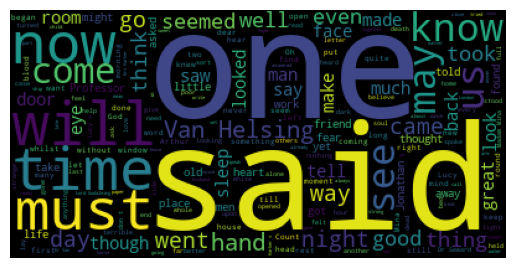

In [4]:
# Create an instance of a WordCloud and use the generate method
cloud = WordCloud(random_state=28).generate(txt)
plt.imshow(cloud);
plt.axis('off');

In [5]:
# define custom stopwords
custom_stopwords = ["said",'will','one', *STOPWORDS]

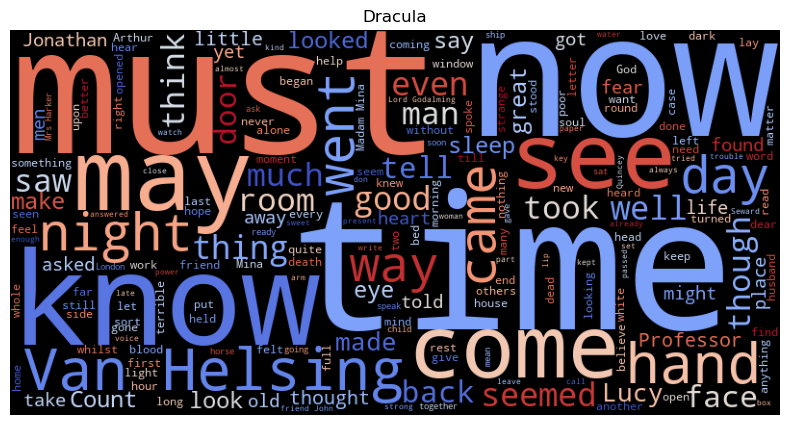

In [16]:
# Create an instance of a WordCloud and use the generate method
cloud = WordCloud(
    random_state=28,
    stopwords = custom_stopwords,
    width = 800,
    height = 400,
    colormap="coolwarm",
    min_word_length=3,
).generate(txt)
plt.figure(figsize = (10, 5))
plt.title("Dracula")
plt.imshow(cloud)
plt.axis("off");

# SpaCy and Frequency Distribution

In [1]:
# additional imports needed
from nltk.probability import FreqDist
import spacy

In [2]:
# Custom text preprocess function

def batch_preprocess_texts(
	texts,
	nlp=None,
	remove_stopwords=True,
	remove_punct=True,
	use_lemmas=False,
	disable=["ner"],
	batch_size=50,
	n_process=-1,
):
	"""Efficiently preprocess a collection of texts using nlp.pipe()

	Args:
		texts (collection of strings): collection of texts to process (e.g. df['text'])
		nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
		remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
		remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
		use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
		disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
		batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
		n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

	Returns:
		list of tokens
	"""
	# from tqdm.notebook import tqdm
	from tqdm import tqdm

	if nlp is None:
		nlp = spacy.load("en_core_web_sm")

	processed_texts = []

	for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
		tokens = []
		for token in doc:
			# Check if should remove stopwords and if token is stopword
			if (remove_stopwords == True) and (token.is_stop == True):
				# Continue the loop with the next token
				continue

			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_punct == True):
				continue

            # Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_space == True):
				continue

            
			## Determine final form of output list of tokens/lemmas
			if use_lemmas:
				tokens.append(token.lemma_.lower())
			else:
				tokens.append(token.text.lower())

		processed_texts.append(tokens)
	return processed_texts

In [5]:
# Creating tokens from a word collection of the novel
tokens = batch_preprocess_texts([txt], batch_size = 2500)
tokens = tokens[0]
# Preview results 
tokens[:20]

1it [00:26, 26.49s/it]


['dracula',
 'bram',
 'stoker',
 'illustration',
 'colophon',
 'new',
 'york',
 'grosset',
 'dunlap',
 'publishers',
 'copyright',
 '1897',
 'united',
 'states',
 'america',
 'according',
 'act',
 'congress',
 'bram',
 'stoker']

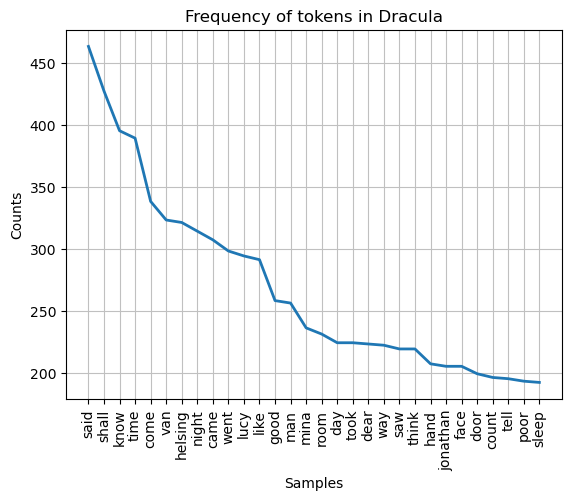

In [6]:
# Defining our distribution and plotting top thirty tokens
dist = FreqDist(tokens)
dist.plot(30, title = 'Frequency of tokens in Dracula');

In [7]:
# We can use our batch preprocessing function to activate lemmas (add use_lemmas = True)
lemmas = batch_preprocess_texts([txt], use_lemmas = True)
lemmas = lemmas[0]
lemmas[:20]

1it [00:27, 27.20s/it]


['dracula',
 'bram',
 'stoker',
 'illustration',
 'colophon',
 'new',
 'york',
 'grosset',
 'dunlap',
 'publisher',
 'copyright',
 '1897',
 'united',
 'states',
 'america',
 'accord',
 'act',
 'congress',
 'bram',
 'stoker']

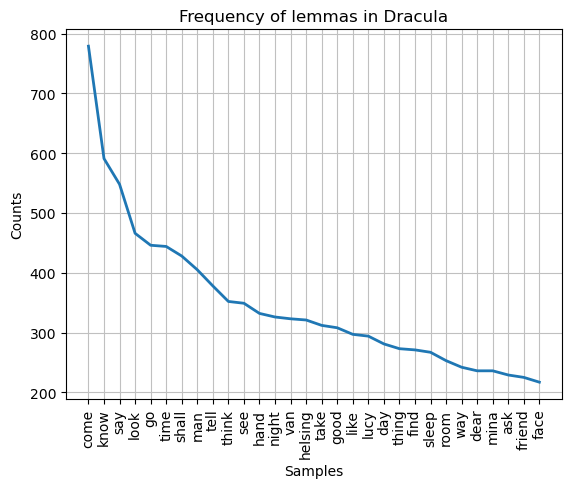

In [8]:
# Defining our distribution and plotting top thirty lemmas
dist = FreqDist(lemmas)
dist.plot(30, title = 'Frequency of lemmas in Dracula');